<a href="https://colab.research.google.com/github/cheul0518/DeepLearning/blob/main/NN_DL/Chapter4_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problems

1. We've seen how to use networks with two hidden layers to approximate an arbitrary function. Can you find a proof showing that it's possible with just a single hidden layer? As a hint, try wroking in the case of just two input variables, and showing that: $(a)$ it's possible to get step functions not just in the $x$ or $y$ directions, but in an arbitrary direction; $(b)$ by adding up many of the constructions from part $(a)$ it's possible to approximate a tower function which is circular in shape, rather than rectrangular; $(c)$ using these circular towers, it's possible to approximate an arbitrary function. To do part (c) it may help to use ideas from a bit later in this chapter.
  - $(a)$ A neuron with two  inputs in a hidden layer can play a role of step functon provided either weights $w_1$ or $w_2$ is very large. In such a case, $\sigma(w_1x+w_2y+b)$ creates a sort of hyperplane. Hyperplane can be located anywhere by adjusting $w_1$, $w_2$, and $b$.
  - $(b)$ Let's suppose there is a circle with the radius of 1 from the origin. You can make as many tangent lines to the circle. The tangent line is $\frac{1}{\tan\theta}x+y+\frac{1}{sin\theta}=0$. You can derive this equation from the assumptions: circle's radius is 1; coordinates on the circle is $(cos\theta,sin\theta)$; tangent line's slope is $-\frac{1}{tan\theta}$ because the multiplication of two perpendicular lines' slopes is -1. (1) Using this equation, we can make a bump function by subtracting the output of a tangent line from the output of the symmetric tangent line: $\frac{1}{\tan\theta}x+y+\frac{1}{sin\theta}=0$ and $\frac{1}{\tan\theta}x+y-\frac{1}{sin\theta}=0$ are symmetric. (2) Furthermore, we can make polygon by adding many of these bump functions. (3) Polygon would be cylinder-shaped through the output activation function. 
  - $(c)$ Multiple number of cylinders can be created. And so we can approximate arbitrary function by adding up many cylinders of different heights, and in different locations. This is exactly same as we approximate arbitrary functions with many towers of different sizes and in different locations. For example, the function in the graph left below can be approximated by fitting many of cylinders in as the graph right below.

    <img src = "https://raw.githubusercontent.com/cheul0518/DeepLearning/main/NN_DL/img/arbitraryFunct.png" width = "30%">
    <img src = "https://raw.githubusercontent.com/cheul0518/DeepLearning/main/NN_DL/img/arbitraryFuncApprox.png" width = "30%">

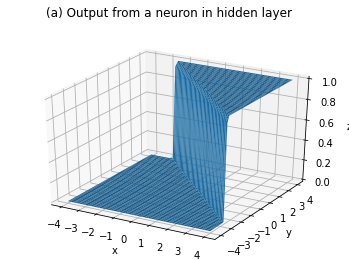

In [ ]:
#@title (a) Step function of w1x + w2y + b, where w1=50/tan(theta), w2=50, bias =-50/np.sin(theta)
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tan(angle, x, y):
    return 1/np.tan(angle)*x + y - 1/np.sin(angle)

def tan_sym(angle, x, y):
    return 1/np.tan(angle)*x + y + 1/np.sin(angle)

# Load a subplot for 3d projection
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Createa ndarrays for x and y between -4 and 4
x = np.linspace(-4,4)
y = np.linspace(-4,4)
# Create a grid for x and y
x, y = np.meshgrid(x, y)
theta = np.pi/4
# w1 is 50/tan(theta), w2 is 50, and bias is -50*1/np.sin(theta)
z = sigmoid(50*tan(theta,x,y))

plt.suptitle('(a) Output from a neuron in hidden layer')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x,y,z)
plt.show()

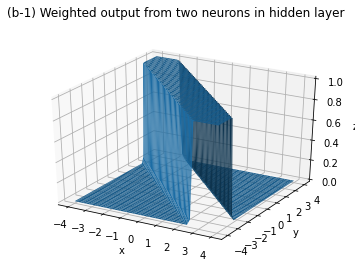

In [ ]:
#@title (b-1) Bump function created by two neurons
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tan(angle, x, y):
    return 1/np.tan(angle)*x + y - 1/np.sin(angle)

def tan_sym(angle, x, y):
    return 1/np.tan(angle)*x + y + 1/np.sin(angle)

# Load a subplot for 3d 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Createa ndarrays for x and y between -4 and 4
x = np.linspace(-4,4)
y = np.linspace(-4,4)
# Create a grid for X and Y
x, y = np.meshgrid(x, y)
# Create a tangent line and its symmetric tangent line
theta = np.pi/4
z = np.zeros(shape=(50,50))
z1 = sigmoid(50*tan(theta,x,y))
z2 = sigmoid(50*tan_sym(theta,x,y))
z = z2 - z1

ax.plot_surface(x,y,z)
plt.suptitle('(b-1) Weighted output from two neurons in hidden layer')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

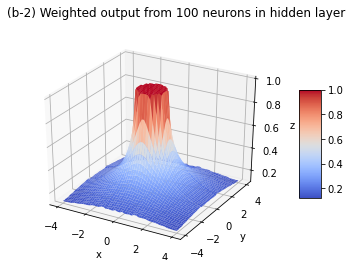

In [ ]:
#@title (b-2) Polygon created by 100 neurons
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter,  LinearLocator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tan(angle, x, y):
    return 1/np.tan(angle)*x + y - 1/np.sin(angle)

def tan_sym(angle, x, y):
    return 1/np.tan(angle)*x + y + 1/np.sin(angle)

# Load a subplot for 3d 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Createa ndarrays for x and y between -4 and 4
x = np.linspace(-4,4)
y = np.linspace(-4,4)
# Create a grid for X and Y
x, y = np.meshgrid(x, y)
# Create angles between -pi/2 and pi/2 except 3 points: -pi/2, 0, pi/2
angles1 = np.linspace(0,np.pi/2,num=51,endpoint=False)[1:]
angles2 = np.linspace(0,-np.pi/2,num=51,endpoint=False)[1:]
angles = np.sort(np.concatenate((angles1, angles2))) # sorting in ascending order

z = np.zeros(shape=(50,50))

for angle in angles:
    if angle < 0:
        z1 = sigmoid(50*tan(angle,x,y))
        z2 = sigmoid(50*tan_sym(angle,x,y))
        z += (1/len(angles))*(z1 - z2) # Output's rescaled by h = 1/len(angles)
    else:
        z1 = sigmoid(50*tan(angle,x,y))
        z2 = sigmoid(50*tan_sym(angle,x,y))
        z += (1/len(angles))*(z2 - z1)

surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm)

plt.suptitle('(b-2) Weighted output from 100 neurons in hidden layer')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

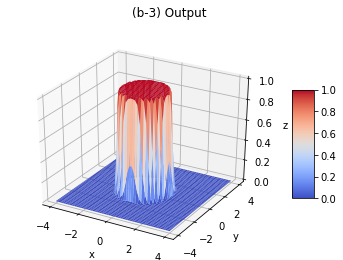

In [ ]:
#@title (b-3) Cylinder in output
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter,  LinearLocator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tan(angle, x, y):
    return 1/np.tan(angle)*x + y - 1/np.sin(angle)

def tan_sym(angle, x, y):
    return 1/np.tan(angle)*x + y + 1/np.sin(angle)

# Load a subplot for 3d 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Createa ndarrays for x and y between -4 and 4
x = np.linspace(-4,4)
y = np.linspace(-4,4)
# Create a grid for X and Y
x, y = np.meshgrid(x, y)
# Create angles between -pi/2 and pi/2 except 3 points: -pi/2, 0, pi/2
angles1 = np.linspace(0,np.pi/2,num=51,endpoint=False)[1:]
angles2 = np.linspace(0,-np.pi/2,num=51,endpoint=False)[1:]
angles = np.sort(np.concatenate((angles1, angles2))) # sorting in ascending order

z = np.zeros(shape=(50,50))

for angle in angles:
    if angle < 0:
        z1 = sigmoid(50*tan(angle,x,y))
        z2 = sigmoid(50*tan_sym(angle,x,y))
        z += (1/len(angles))*(z1 - z2) # Output's rescaled by h = 1/len(angles)
    else:
        z1 = sigmoid(50*tan(angle,x,y))
        z2 = sigmoid(50*tan_sym(angle,x,y))
        z += (1/len(angles))*(z2 - z1)
z = sigmoid(100*z-40)
surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm)

plt.suptitle('(b-3) Output')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

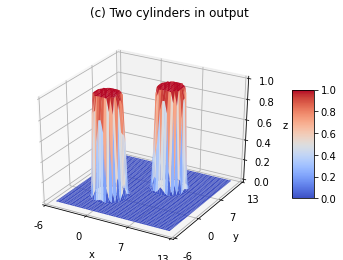

In [ ]:
#@title (c) Two Cylinders in output
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter,  LinearLocator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tan(angle, x, y):
    return 1/np.tan(angle)*x + y - 1/np.sin(angle)

def tan_sym(angle, x, y):
    return 1/np.tan(angle)*x + y + 1/np.sin(angle)

# Load a subplot for 3d 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Createa ndarrays for x and y between -4 and 4
x = np.linspace(-5,12)
y = np.linspace(-5,12)
# Create a grid for X and Y
x, y = np.meshgrid(x, y)
# Create angles between -pi/2 and pi/2 except 3 points: -pi/2, 0, pi/2
angles1 = np.linspace(0,np.pi/2,num=51,endpoint=False)[1:]
angles2 = np.linspace(0,-np.pi/2,num=51,endpoint=False)[1:]
angles = np.sort(np.concatenate((angles1, angles2))) # sorting in ascending order

z = np.zeros(shape=(50,50))

for angle in angles:
    if angle < 0:
        z1 = sigmoid(50*tan(angle,x,y))
        z2 = sigmoid(50*tan_sym(angle,x,y))
        z3 = sigmoid(50*tan(angle,x-6,y-6)) # Shift x by 6 and y by 6
        z4 = sigmoid(50*tan_sym(angle,x-6,y-6)) # Shift x by 6 and y by 6
        z += (1/len(angles))*(z1 - z2 + z3 - z4) # Output's rescaled by h = 1/len(angles)
    else:
        z1 = sigmoid(50*tan(angle,x,y))
        z2 = sigmoid(50*tan_sym(angle,x,y))
        z3 = sigmoid(50*tan(angle,x-6,y-6))
        z4 = sigmoid(50*tan_sym(angle,x-6,y-6))
        z += (1/len(angles))*(z2 - z1 + z4 - z3)
z = sigmoid(100*z-40)
surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm)

plt.suptitle('(c) Two cylinders in output')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.xaxis.set_major_locator(LinearLocator(4))  # Partition x ticks into 4 divisions
ax.yaxis.set_major_locator(LinearLocator(4))  # Partition y ticks into 4 divisions
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

2. Earlier in the book we met another type of neuron known as a rectified  linear unit. Explain why such neurons don't satisfy the conditions just given for universality. Find a proof of universality showing that rectified  linear units are universal for computation.
  - Relu(Rectified linear unit) is not well-defined as $z$ approaches $\infty$, because Relu is $max(0,z)$ and there is no finite limit for  universality. However, Relu can have nonlinear property by adding/subtracting Relu functions. For example, Relu(x) - Relu(x-1) perfoms pretty much of sigmoid function. Unlike classic linear functions, Relu can achieve nonlinearity, and thus approximate arbitrary functions to any desired precision.
  
    <img src ="https://raw.githubusercontent.com/cheul0518/DeepLearning/main/NN_DL/img/ComposedRelu.png" width=40%>

3. Suppose we consider linear neurons, i.e., neurons with the activation function $s(z)=z$. Explain why linear neurons don't satisfy the conditions just given for universality. Show that such neurons can't be used to do universal computation.
  - Linear functions such as $s(z)=z$ are not well defined as $z\to\infty$ and $z\to-\infty$. Both cases do not have finite limits. Unlike Relu function, any linear combination of the activation function $s(z)=z$ is either a linear function or a constant. Thus, the whole network would be equivalent to a linear function so that it cannot achieve universal approximation due to linearity.